# Data Science in Economics
#### Class -1 Data manipulation & Visulaization

07/09/2023





<fieldset>
  <legend><font color="#282FA4 "><b>Class plan</b></font></legend>


  <div>
    <input type="checkbox" id="point1" name="point1"/>
    <label for="scales">Data preprocessing (light) - pandas</label>
  </div>

  <div>
    <input type="checkbox" id="point2" name="point2" />
    <label for="horns">EDA: summary statistics</label>
  </div>

<div>
    <input type="checkbox" id="point3" name="point3" />
    <label for="horns">EDA: visulizations - seaborn, matplotlib</label>
  </div>

</fieldset>



<font color="#282FA4 "> Q0: Why to learn to work with tabular data?</font>


<details>
 <summary> Details </summary>

> In machine learning, as a rule, everything comes down to the analysis of  tabular data. We can start with a large number of complex tables, images, texts, or something else complicated, but in the end it all usually comes down to one table, where each object is described by a set of features. Therefore, it is important to be able to work with tables.

> And there are also some studies showing that in solving the problem of data mining, usually 20% of the time is spent on building models and other interesting work related to what is being told in our lectures, and 80% of the time is spent by specialists on data preparation and processing. This includes the transformation of data,  elimination of outliers and omissions, etc. And this is also, in fact, manipulations with tables.

> Conclusion: it is important to be able to work with tabular data. Python has a pandas library for this, which we will study today.





</details>

In [89]:
#Import libraries
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

# Data preprocessing


As always in Data Science you are starting with making nice cup of tea (or coffee).☕️

Your next move is to load the data

In [ ]:
# 1. Load the data
# Elegant way to load data from github page to colab - use magic command from linux paradigm

!wget -c https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv

# 2. Read dataset 'flats_prices.csv' in csv format and write it to variable flats
flats  = pd.read_csv('flats_moscow.csv')
type(flats)


--2023-09-07 04:57:09--  https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



pandas.core.frame.DataFrame

In [ ]:
# 3. Let's have a look at the dataset

# Display first 10 observations using head()
flats.head(10)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3
5,6,137,76,50,9.0,11.0,7,1,1,1,8
6,7,98,59,39,6.0,7.5,10,0,0,1,8
7,8,88,55,36,6.0,9.0,5,1,1,0,4
8,9,225,80,56,9.0,9.0,5,1,1,1,3
9,10,140,86,51,10.0,12.7,10,1,0,1,5


In [ ]:
# Display basic information about dataset using info()
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


We are lucky today, no missing values indicated!

In [ ]:
# Alternative ways to get the same info:
# * Use 'shape' method to get number of observations and columns
print(flats.shape)
print("~~~ ~~~ ~~~")

# Use 'count()' to see the number of non-empty observations
print(flats.count())
print("~~~ ~~~ ~~~")

# Use 'dtypes' to see the number of non-empty observations
print(flats.dtypes)


(2040, 10)
~~~ ~~~ ~~~
price        2040
totsp        2040
livesp       2040
kitchensp    2040
dist         2040
metrdist     2040
walk         2040
brick        2040
floor        2040
code         2040
dtype: int64
~~~ ~~~ ~~~
price          int64
totsp          int64
livesp         int64
kitchensp    float64
dist         float64
metrdist       int64
walk           int64
brick          int64
floor          int64
code           int64
dtype: object



<font color="#282FA4 "> Q1: What is the meaning of columns? </font>


<details>
<summary> Details </summary>

- **Price ($1000)**:  This column represents the price of the apartment in thousands of dollars.

- **Totsp (Total Area)**: Total area of the apartment in square meters.

- **Livesp (Living Area)**: Living area of the apartment in square meters.

- **Kitsp (Kitchen Area)**: Kitchen area of the apartment in square meters.

- **Dist (Distance to Center)**: Distance from the apartment to the city center in kilometers.

- **Metrdist (Distance to Metro)**: Distance from the apartment to the nearest metro station in minutes.

- **Walk (Proximity to Metro)**: Indicates if the apartment is within walking distance (1) from the metro station or not (0).

- **Brick (Building Material)**: Indicates if the building is made of brick or reinforced concrete (1), or if it's made of another material (0).

- **Floor (Floor Level)**: Indicates if the apartment is located on a floor other than the first and last floors (1), or if it's on the first or last floor (0).


🔗 [Source of data >>>](https://www.kaggle.com/datasets/hugoncosta/price-of-flats-in-moscow)

</details>

<font color="#282FA4 "> Q2: What are the main raw data pitfalls ? </font>

<details>
 <summary> Details </summary>

Data representation:
- Inconvient column headers (values, not variable names)
- Multiple variables stored in one column (split)
- Variables stored in both rows and column (rotate)
- Multiple types of observational units are stored in the same table (split)
- Single observational unit stored in multiple tables (join)

Data content:
- Inconsistent units of measurement (normalize)
- Incomplete data


</details>

How to rename column? We want to rename kitsp to kitchensp
Let us try?


In [ ]:
#4. Rename columns
# Rename kitsp to kitchensp using 'rename' method
flats.rename(columns={'kitsp':'kitchensp'},inplace = True)
flats.columns

# Alternatie way - use "set_axis" to rename several columns at once
#flats.set_axis(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist',
       #'metrdist', 'walk', 'brick', 'floor', 'code'], axis=1, inplace = True)


Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitchensp', 'dist',
       'metrdist', 'walk', 'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
#5. Drop "old index column" - "Unnamed: 0"

flats.drop(['Unnamed: 0'],axis=1, inplace = True)
flats.columns


Index(['price', 'totsp', 'livesp', 'kitchensp', 'dist', 'metrdist', 'walk',
       'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
# 6. Check adequacy of the categorical variables by considering the number of unique observations
# Count unique observations by "nunique()"

flats.nunique()

price        180
totsp         91
livesp        58
kitchensp     22
dist          22
metrdist      14
walk           2
brick          2
floor          2
code           8
dtype: int64

In [135]:
# Display unique observations for variable "code"

flats.code.unique()

array([3, 6, 1, 8, 4, 5, 7, 2])

What is the maximum floor?

# EDA: statistical analysis

<font color="#282FA4 "> Q3: What are the goals of  explanatory data analysis  ? </font>

<details>
 <summary> Details </summary>

- Ideas for hypotheis testing
- Ideas for further modelling

</details>

<font color="#282FA4 "> Q4: What are the basic measures to consider ? </font>

<details>
 <summary> Details </summary>

- measures of the center: mean, median
- measures of the spread: variance, range
- measures of the skewness: kurtosis
- outliers

</details>







In [ ]:
# 7. Display summary statitics by using "describe" method

flats.describe()

,price,totsp,livesp,kitchensp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


Let's play with data, practice selections and inestigate several ideas:

- **q0:** What are the prices and floor levels of the first 5 flats ?
- **q1:** Are more expensive flats located closer to metro?
- **q2:** What is the mean living area of the apartment located on on ground floor and within walking distance?
- **q3:** What is the maximum living area of the apartment for apartment within walking distance to the metro and with price < 200?
- **q4:** What is the distribution of the flats by floors in the dataset?


Selection techniqies:
- by position (.loc[])
- by names (data.column_name/data['column_name'])
- by condition (data[condition])
- by query (data.query())

[More on data selection >>>](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [ ]:
#q0: what are the prices and floor levels of the first 5 flats
# Use ".loc[x]" , ! Attention to the indexation in python

print(flats.loc[0:4,['price','floor']])

   price  floor
0     81      1
1     75      1
2    128      1
3     95      1
4    330      1


In [ ]:
# q1: Are more expensive flats located closer to metro?

mean_w1 = flats[flats['walk']==1]['price'].mean()
mean_w0 = flats[flats['walk']==0]['price'].mean()

print("Mean price of flats near metro = {} , mean price of flats distant from metro = {}".format(round(mean_w1),
                                                                                                 round(mean_w0)))

Mean price of flats near metro = 133 , mean price of flats distant from metro = 116


In [ ]:
# Alternative way: use data.query((condition))
flats.query('walk == 1')['price'].mean()


132.83273766976413

In [ ]:
# q2: What is the mean living area of the apartment
# on the ground floor and within walking distance?
# Use selection by cindition  [(condition 1) & (condition 2)]

flats[(flats['walk']==1)&(flats['floor']==0)]['livesp'].mean()


45.17607973421927

What is the maximum living area of the apartment for apartment on the walk==1 and with price < 200?

In [ ]:
# q3: What is the maximum living area of the apartment within walking distance to the metro
# and with price < 200?

flats[(flats['walk']==1)&(flats['price']<200)]['livesp'].max()

78

In [ ]:
# q4. What is the distribution of the flats by floors in the dataset?
# Use method "value_counts", use sort_index to hae nice output

flats['code'].value_counts().sort_index()

1    272
2    215
3    345
4    209
5    336
6    257
7    226
8    180
Name: code, dtype: int64

# EDA: data visualization

Let's invistigate prices firther:
- q1: what is the distribution of prices?
- q2: what is the relationship between prices and distance to metro station?
- q3: what is the relationship between prices and floor level?

Commonly used packages matplotlib, seaborn, pyplot...

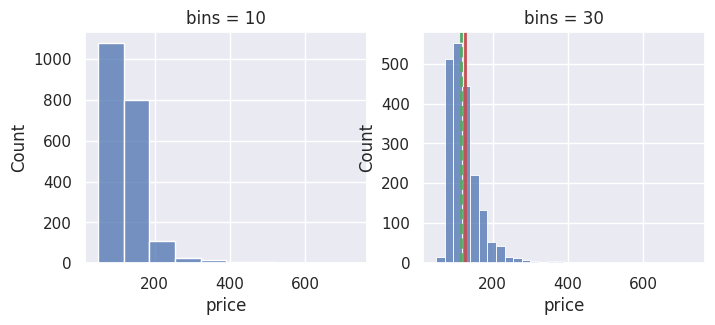

In [110]:
%matplotlib inline
sns.set()


# q1: what is the distribution of prices?

fig, ax = plt.subplots(1,2,figsize=(8, 3))

sns.histplot(flats.price,bins=10,kde=False, ax = ax[0])
ax[0].set_title('bins = 10')

sns.histplot(flats.price,bins=30,kde=False, ax = ax[1])
ax[1].set_title('bins = 30')
ax[1].axvline(flats.price.mean(), color='r', lw=2)
ax[1].axvline(flats.price.median(), color='g', ls = "--", lw=2)

fig.show()

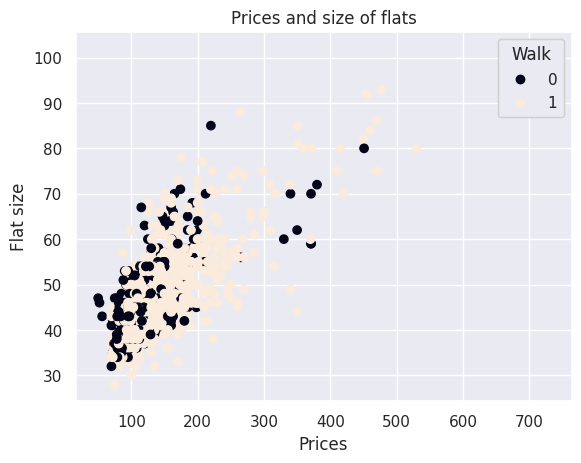

In [126]:
# q2: what is the relationship between prices and distance to metro station?

fig, ax = plt.subplots()
scatter1 = ax.scatter(flats['price'].values,flats['livesp'].values, c=flats['walk'])
ax.set_title('Prices and size of flats')


legend1 = ax.legend(*scatter1.legend_elements(),
                    loc="upper right", title="Walk")
ax.add_artist(legend1)

ax.set(ylabel='Flat size')

ax.set(xlabel='Prices')

plt.show()

<Axes: xlabel='code', ylabel='price'>

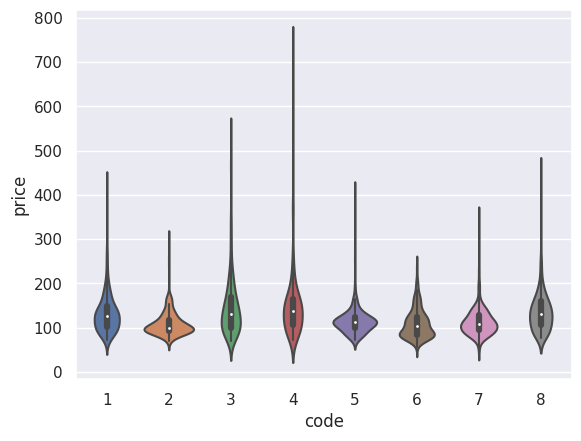

In [136]:
# q3: what is the relationship between prices and floor level?
sns.violinplot(data=flats, x="code", y="price")

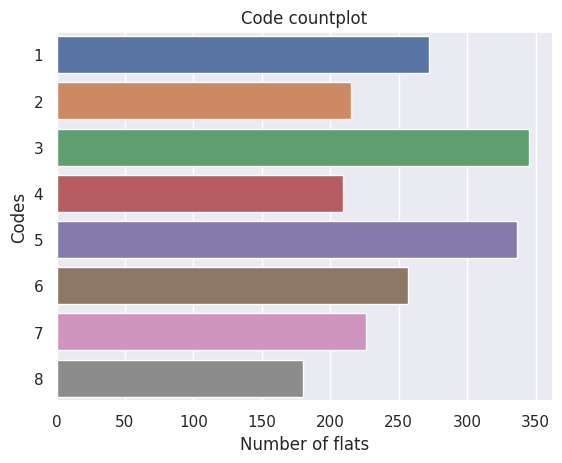

In [ ]:
# Alternative display

fig, ax = plt.subplots()
ax = sns.countplot(y = 'code', data = flats)
ax.set_title('Code countplot')
ax.set_ylabel('')

ax.set(ylabel='Codes')

ax.set(xlabel='Number of flats')

plt.show()